In [1]:
%matplotlib inline

In [2]:
import csv
import numpy as np
import pandas as pd
import sklearn as sk
from PIL import Image
import seaborn as sns
from scipy import stats

In [3]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [4]:
import matplotlib.pyplot as plt
sns.set()

The data is a CSV file of tumor cell features from 569 patients.

Columns 1-2 are Patient ID and Malignant/Benign classification

Columns 3-12, 13-22, and 23-32 contain the means, standard errors, and largest values (respectively) of the following 10 features:

Radius (mean of centre to perimeter)
Texture (SD of gray-scale values)
Perimeter
Area
Smoothness (variation in radius)
Compactness (perimeter squared, divided by area - 1)
Concavity (severity of concavity in contour)
Concave points (number of concavities in contour)
Symmetry
Fractal dimension (coastline approximation – 1)

(e.g. column 3 is mean radius, column 13 is standard error of radius, column 23 is largest radius observed, etc)

In [5]:
var = ["Radius", "Texture", "Perimeter", "Area", "Smoothness",  "Compactness", "Concavity", "Concave points", "Symmetry", "Fractal dimension"]

In [6]:
cols = ["lbl"]
cols.extend([i + "_avg" for i in var])
cols.extend([i + "_std" for i in var])
cols.extend([i + "_max" for i in var])

In [7]:
data = pd.read_csv('./Exercise1 - data.csv', header=None, names=cols)

In [8]:
X = data.values[:, 1:]
X = X.astype(float)

In [9]:
data.head()

,lbl,Radius_avg,Texture_avg,Perimeter_avg,Area_avg,Smoothness_avg,Compactness_avg,Concavity_avg,Concave points_avg,Symmetry_avg,...,Radius_max,Texture_max,Perimeter_max,Area_max,Smoothness_max,Compactness_max,Concavity_max,Concave points_max,Symmetry_max,Fractal dimension_max
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data[data["lbl"] == "M"].describe()

,Radius_avg,Texture_avg,Perimeter_avg,Area_avg,Smoothness_avg,Compactness_avg,Concavity_avg,Concave points_avg,Symmetry_avg,Fractal dimension_avg,...,Radius_max,Texture_max,Perimeter_max,Area_max,Smoothness_max,Compactness_max,Concavity_max,Concave points_max,Symmetry_max,Fractal dimension_max
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [11]:
data[data["lbl"] == "B"].describe()

,Radius_avg,Texture_avg,Perimeter_avg,Area_avg,Smoothness_avg,Compactness_avg,Concavity_avg,Concave points_avg,Symmetry_avg,Fractal dimension_avg,...,Radius_max,Texture_max,Perimeter_max,Area_max,Smoothness_max,Compactness_max,Concavity_max,Concave points_max,Symmetry_max,Fractal dimension_max
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [12]:
Y = data.values[:,0]

In [13]:
Y[Y == 'B'] = 0
Y[Y == 'M'] = 1

In [14]:
Y = Y.astype(int)

37 % maligne - the dataset is balanced

In [15]:
Y.mean()

0.37258347978910367

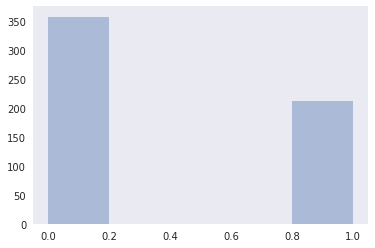

In [16]:
sns.distplot(Y, kde=False)
plt.grid()

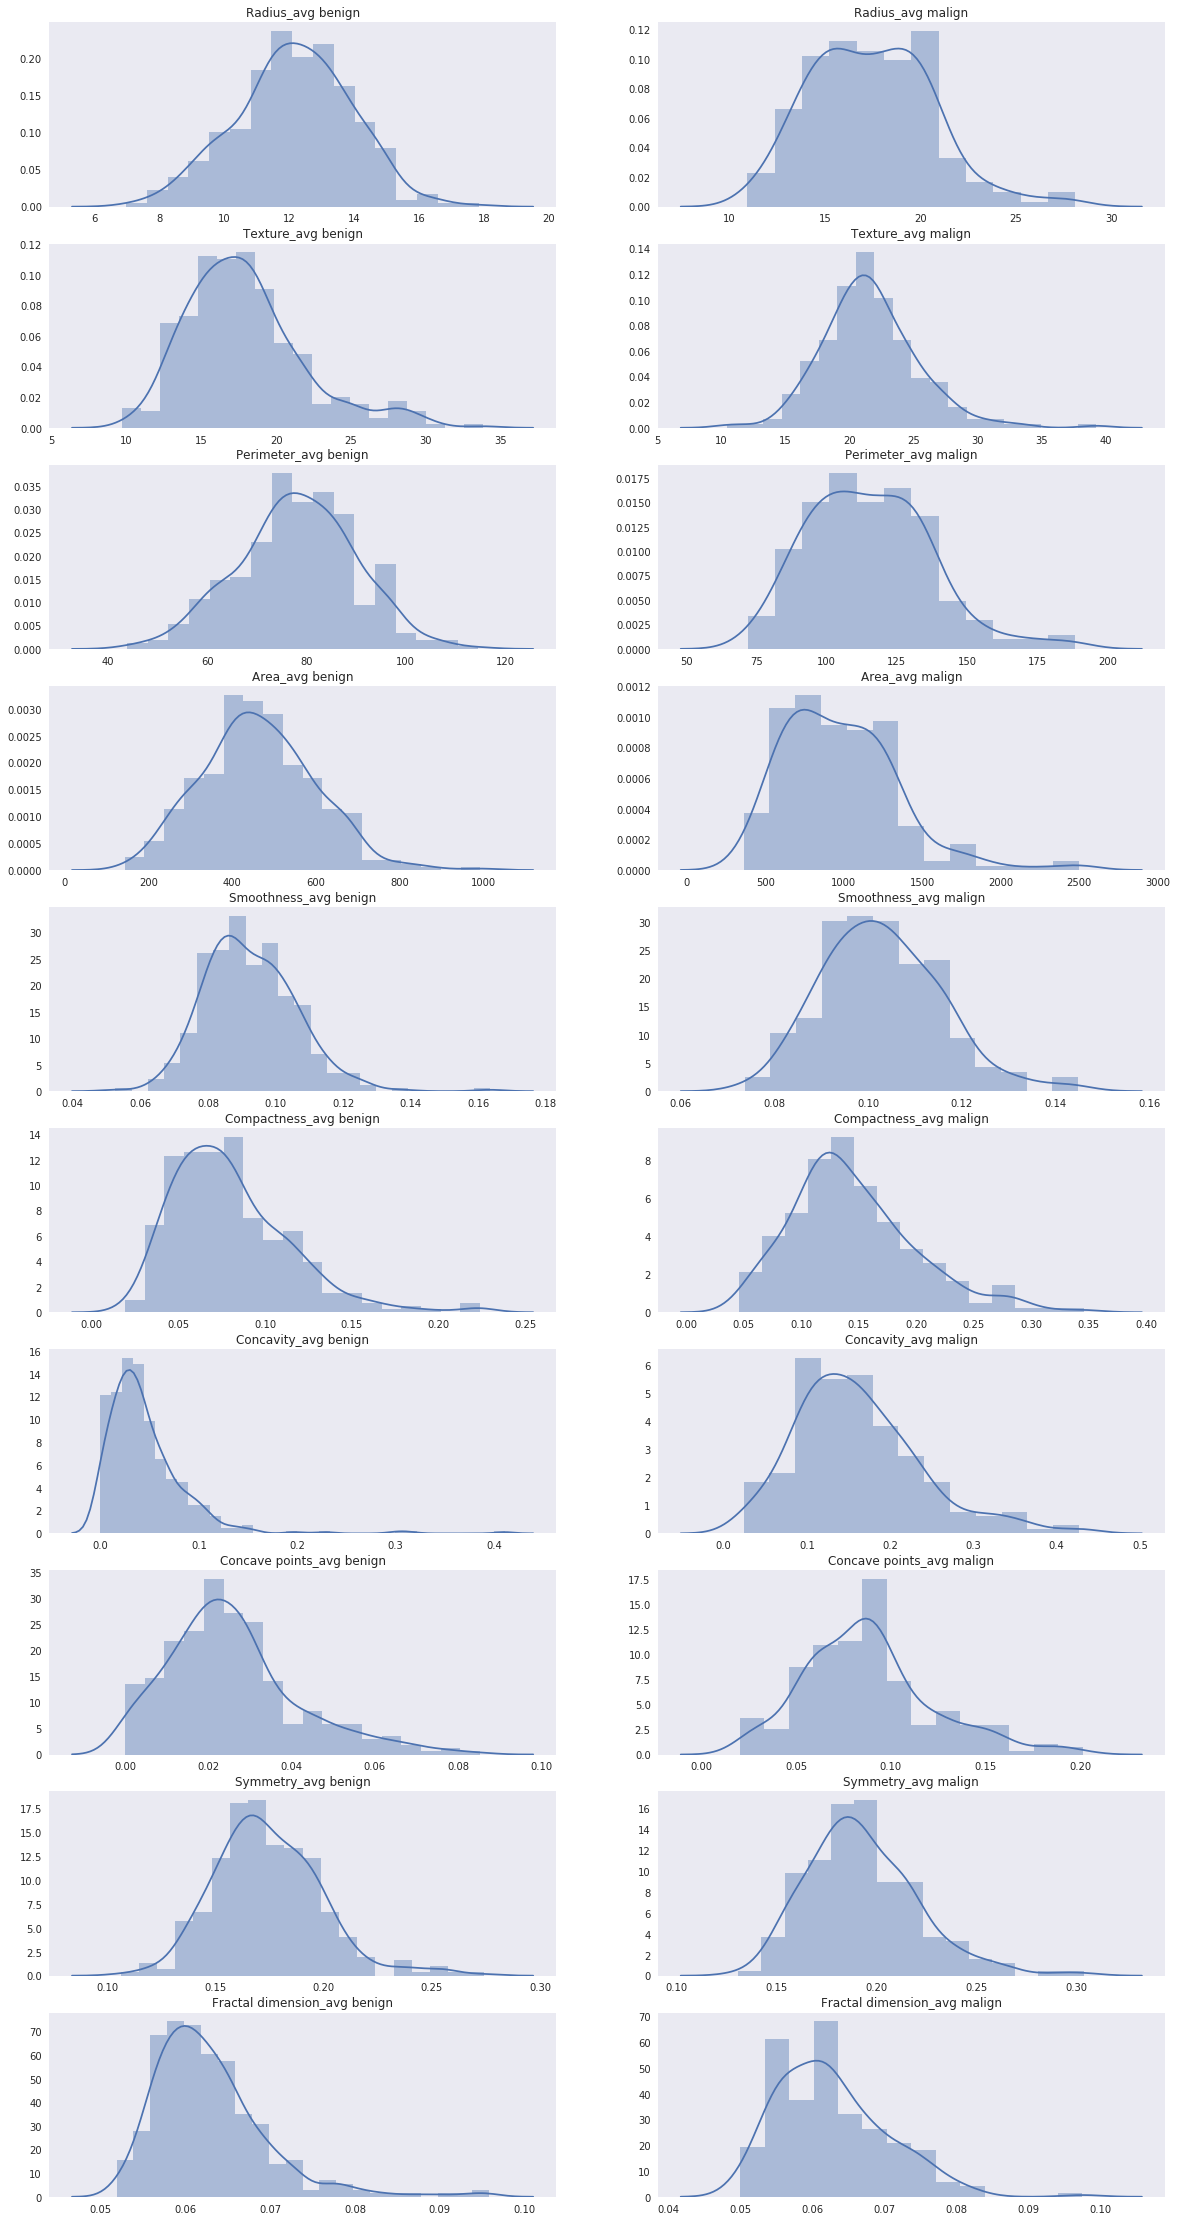

In [17]:
f, ax = plt.subplots(10, 2, figsize=(20,40))

for i in range(10):
    var = X[:,i]
    ax[i,0].set_title(cols[i+1] + " benign")
    ax[i,1].set_title(cols[i+1] + " malign")
    sns.distplot(var[Y==0], kde=True, ax=ax[i,0])
    sns.distplot(var[Y==1], kde=True, ax=ax[i,1])
    ax[i,0].grid()
    ax[i,1].grid()
plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10, stratify=Y)

In [19]:
y_test.shape[0]

171

balanced test set

In [20]:
y_test.mean()

0.3742690058479532

In [21]:
def scale(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

In [22]:
def routine(clf,parameters, x_train, y_train, x_test, y_test):
    
    grid = GridSearchCV(clf, parameters, scoring="accuracy")
    grid.fit(x_train, y_train)
    
    clf = grid.best_estimator_
    clf.fit(x_train, y_train)  
    best_score = clf.score(x_train,y_train)
    test_score = cross_val_score(clf, x_test, y_test, cv=5, scoring = "accuracy").mean()
    
    return best_score, test_score, clf

baseline

In [23]:
logistic = {"C" : [0.1, 0.5, 1, 5, 10, 50, 100]}

In [24]:
clf = LogisticRegression()

In [25]:
train_score, test_score, clf = routine(clf, logistic, x_train, y_train, x_test, y_test)

In [26]:
clf

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
train_score

0.97738693467336679

In [28]:
test_score

0.91241660300483818

In [29]:
y_pred = clf.predict(x_test)

In [30]:
confusion = confusion_matrix(y_test, y_pred)

In [31]:
confusion

array([[100,   7],
       [  5,  59]])

in this particular case we care more about false negative than false positive

In [32]:
print(confusion / confusion.sum() * 100)

[[ 58.47953216   4.09356725]
 [  2.92397661  34.50292398]]


try some other classifiers

In [33]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
svm_linear    = {"C" : [0.1, 0.5, 1, 5, 10, 50, 100]}
svm_rbf       = {"C" : [0.1, 0.5, 1, 5, 10, 50, 100], "gamma" : [0.1, 0.5, 1, 3, 6, 10]}
random_forest = {"max_depth" : [3, 5, 7, 50], "min_samples_split" : [3, 5, 9]}
knn           = {"n_neighbors" : [3, 5, 10, 20, 50], "leaf_size" : [5, 10, 15, 60]}

classifiers = {"svm_linear":svm.SVC(kernel='linear'), "svm_rbf":svm.SVC(kernel='rbf'), "random_forest": RandomForestClassifier(),
               "knn": KNeighborsClassifier()}
parameters  = {"svm_linear":svm_linear, "svm_rbf":svm_rbf,"random_forest": random_forest, 
               "knn":knn}

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10, stratify=Y)

In [45]:
x_train, x_test = scale(x_train, x_test)

In [47]:
res = {}
for c in ["svm_linear", "svm_rbf", "random_forest", "knn"]:
    train_score, test_score, clf = routine(classifiers[c], parameters[c], x_train, y_train, x_test, y_test)
    res[c] = [test_score, clf]

In [48]:
res

{'knn': [0.95915966386554619,
  KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=3, p=2,
             weights='uniform')],
 'random_forest': [0.94096765979118913,
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=5, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)],
 'svm_linear': [0.97629233511586455,
  SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)],
 'svm_rbf': [0.93562006620830152,
  SVC(C=1, cache

In [49]:
clf = res["svm_linear"][1]

In [50]:
y_pred = clf.predict(x_test)

In [51]:
confusion = confusion_matrix(y_test, y_pred)

In [54]:
print(confusion / confusion.sum() * 100)

[[ 61.98830409   0.58479532]
 [  1.16959064  36.25730994]]


we have chosen a linear classifier. It is meaningful to inspect the coefficients' magnitude

In [55]:
clf.coef_

array([[ 0.22648155,  0.19677819,  0.2136242 ,  0.25141272,  0.0497752 ,
        -0.20760407,  0.28188699,  0.28077451,  0.03516189, -0.17342664,
         0.35568657, -0.08069528,  0.26276386,  0.29068333,  0.02945382,
        -0.15429546,  0.01069134, -0.11029334, -0.10976563, -0.00367786,
         0.42087914,  0.48886899,  0.37668356,  0.39507883,  0.3874698 ,
        -0.09398373,  0.25764952,  0.18999872,  0.31245586,  0.22433625]])

we clearly see that higher the max values of our variables (compactness excluded), higher is the probability to have a malignant cancer

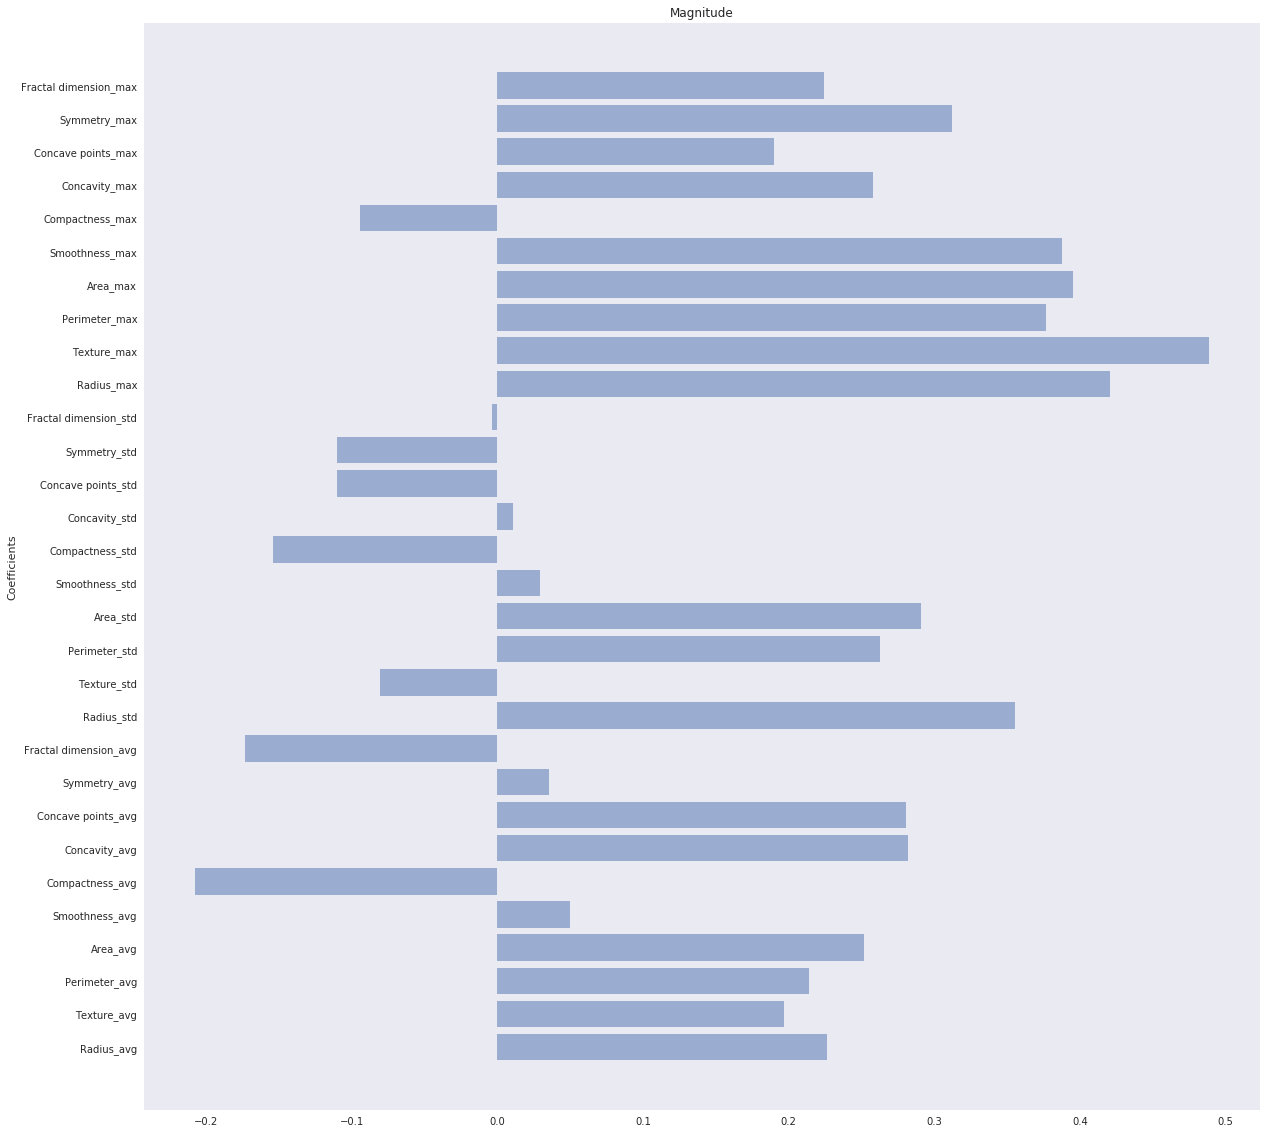

In [56]:
y_pos = np.arange(len(cols[1:]))
p = clf.coef_[0]

plt.figure(figsize=(20,20))
plt.barh(y_pos, p, align='center', alpha=0.5)
plt.yticks(y_pos, cols[1:])
plt.ylabel('Coefficients')
plt.title('Magnitude')
plt.grid()

plt.show()

let's try some unsupervised methods

In [86]:
from sklearn.cluster import KMeans

In [87]:
cluster = KMeans(2, max_iter=10000)

In [88]:
cluster.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
y_pred = cluster.predict(x_test)

In [90]:
confusion_unsupervised = confusion_matrix(y_test, y_pred)

In [91]:
print(confusion_unsupervised / confusion_unsupervised.sum() * 100)

[[ 60.23391813   2.33918129]
 [  7.01754386  30.40935673]]
